Andrew Brown - Machine Learning Stock Prices
Project adapted from resources online to fit datasets needed. 

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np

#Import matplotlib
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib

#Import sklearn and keras
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.optimizers import Adam
from keras.optimizers import Adam
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from tensorflow.keras.utils import plot_model

Use the datesets from kaggle for training. First step is to import the dataset using pandas and then read off the head to ensure that the data was imported properly

In [2]:
#Get the Dataset
df=pd.read_csv("MicrosoftStockData.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_19820\2898180643.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("MicrosoftStockData.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Adj Close,Close,Volume
Date,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749


Stock data directly from the CSV can be plotted here to show the overall stock price over the years provided. This can also act as validation that the dataset was imported correctly.
Open, High, Low, and Volume will be used as features to determine the predictive close

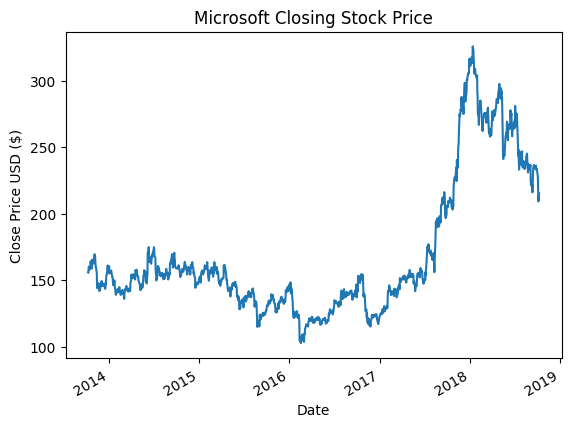

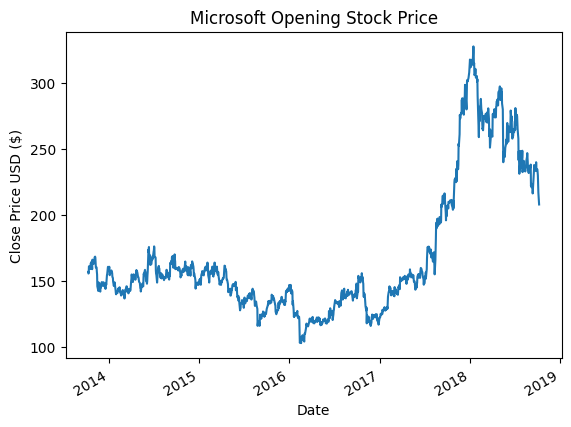

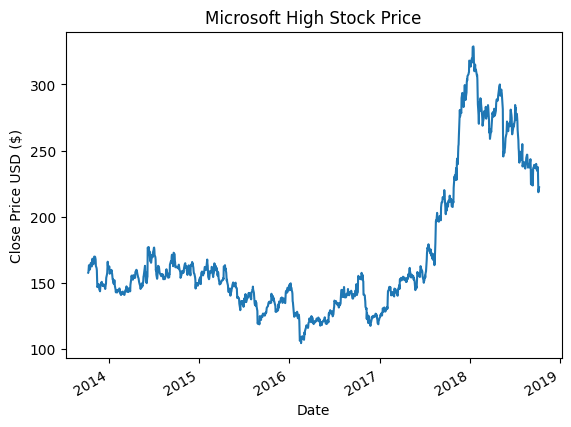

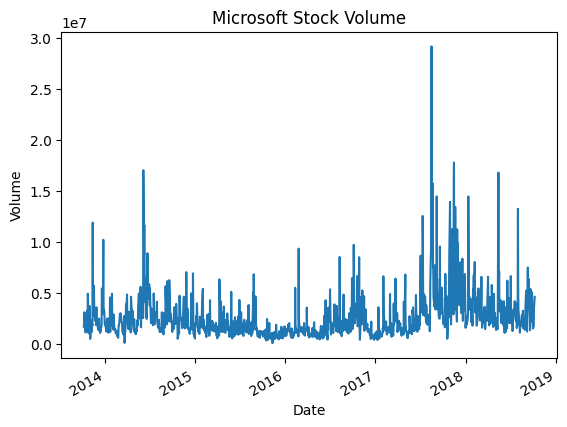

In [3]:
#Plot the True Adj Close Value
df['Close'].plot()
#title
plt.title('Microsoft Closing Stock Price')
#axis labels
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

#Plot the True Open Value
df['Open'].plot()
#title
plt.title('Microsoft Opening Stock Price')
#axis labels
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()


#Plot the True High Value
df['High'].plot()
#title
plt.title('Microsoft High Stock Price')
#axis labels
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()



#Plot the True High Value
df['Volume'].plot()
#title
plt.title('Microsoft Stock Volume')
#axis labels
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

State that the output will be based on close and that the features will be the ones listed from the table

In [4]:
#Target Variable
output = pd.DataFrame(df['Close'])
#Characteristics
features = ['Open', 'High', 'Low', 'Volume']

Scale the data so that the numbers are smaller and easier to process from a compuational point of view

In [5]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
#display the result of the scaling
#display the first 5 rows
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-10-08,0.467290,0.524872,0.482066,0.156130
2018-10-05,0.507343,0.508588,0.477780,0.117540
2018-10-04,0.536271,0.549632,0.524024,0.055983
2018-10-03,0.565198,0.592907,0.567336,0.055289
2018-10-01,0.585447,0.579969,0.546131,0.049313


Split the data into the training set and test set as described in the report. This is a 90-10 split

In [6]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [7]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
#Reshape the data
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

Create the simple LSTM model as a sequential model 
This is also where epochs and batch size is determined which can be adjusted based on output

In [8]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
history=lstm.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, shuffle=False)

Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 46728.8594
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46506.2656
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45978.7383
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44928.8984
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43229.3984
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40899.4102 
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38062.7031
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34876.4531 
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31487.2715
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28018.0098
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24568.8262
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21221.1641
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18040.9805
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15080.6123
Epoch 15/5

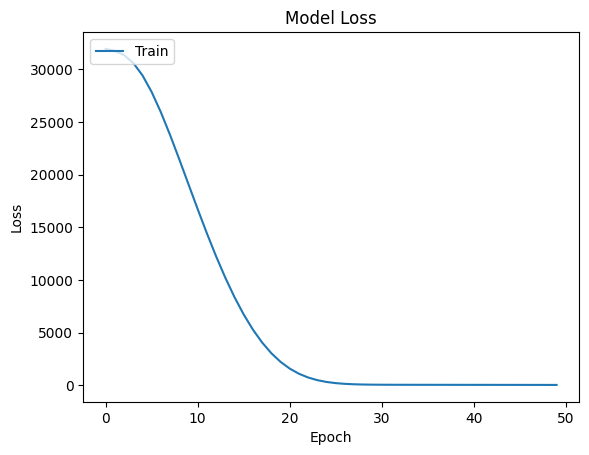

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [9]:
#Plot the Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
y_pred= lstm.predict(X_test)


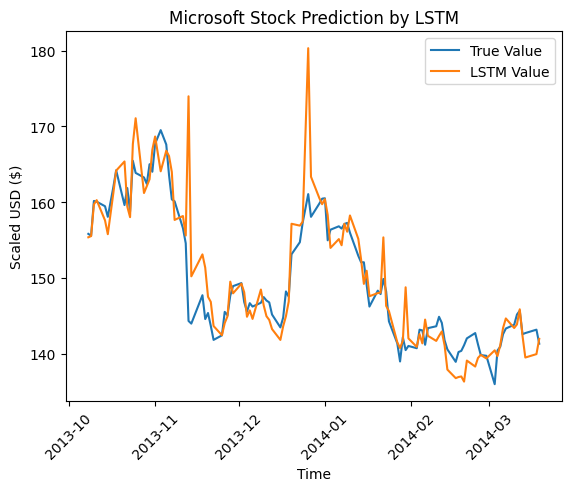

In [10]:
#Predicted vs True Adj Close Value – LSTM
#add the date
plt.plot(df.index[-len(y_test):], y_test, label='True Value')
plt.plot(df.index[-len(y_test):], y_pred, label='LSTM Value')
plt.title("Microsoft Stock Prediction by LSTM")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Scaled USD ($)')
plt.legend()
plt.show()




